## Project 4
Predicting the Probability of Customers Will Not Paying (Defaulting) in Credit Card using Classification Model.

### Credit Card Dataset
    Dataset about customers credit information and the status of credit card payment(default or not default)

### Data Source :
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

### Business Problem
    How to increase reduce default rate of credit card by predicting the probability of customers going to default?

### Objective
    Build a classification model to predict customers' default probability

### Data Cleansing

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Credit Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
## Check Missing Values

In [11]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
## Check Outliers

In [13]:
for col in df.columns:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for ID
(0, 25)
Running for LIMIT_BAL
(167, 25)
Running for SEX
(0, 25)
Running for EDUCATION
(454, 25)
Running for MARRIAGE
(0, 25)
Running for AGE
(272, 25)
Running for PAY_0
(3130, 25)
Running for PAY_2
(4410, 25)
Running for PAY_3
(4209, 25)
Running for PAY_4
(3508, 25)
Running for PAY_5
(2968, 25)
Running for PAY_6
(3079, 25)
Running for BILL_AMT1
(2400, 25)
Running for BILL_AMT2
(2395, 25)
Running for BILL_AMT3
(2469, 25)
Running for BILL_AMT4
(2622, 25)
Running for BILL_AMT5
(2725, 25)
Running for BILL_AMT6
(2693, 25)
Running for PAY_AMT1
(2745, 25)
Running for PAY_AMT2
(2714, 25)
Running for PAY_AMT3
(2598, 25)
Running for PAY_AMT4
(2994, 25)
Running for PAY_AMT5
(2945, 25)
Running for PAY_AMT6
(2958, 25)
Running for default.payment.next.month
(6636, 25)


In [14]:
for col in df.columns[:-1]:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]
    

Running for ID
Running for LIMIT_BAL
Running for SEX
Running for EDUCATION
Running for MARRIAGE
Running for AGE
Running for PAY_0
Running for PAY_2
Running for PAY_3
Running for PAY_4
Running for PAY_5
Running for PAY_6
Running for BILL_AMT1
Running for BILL_AMT2
Running for BILL_AMT3
Running for BILL_AMT4
Running for BILL_AMT5
Running for BILL_AMT6
Running for PAY_AMT1
Running for PAY_AMT2
Running for PAY_AMT3
Running for PAY_AMT4
Running for PAY_AMT5
Running for PAY_AMT6


In [15]:
df.shape

(8624, 25)

In [17]:
df["default.payment.next.month"].value_counts()

default.payment.next.month
0    7115
1    1509
Name: count, dtype: int64

In [18]:
## Check Duplicated

In [19]:
df.duplicated().sum()

0

### EDA

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
18,19,360000.0,2,1,1,49,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,20,180000.0,2,1,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8624 entries, 3 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          8624 non-null   int64  
 1   LIMIT_BAL                   8624 non-null   float64
 2   SEX                         8624 non-null   int64  
 3   EDUCATION                   8624 non-null   int64  
 4   MARRIAGE                    8624 non-null   int64  
 5   AGE                         8624 non-null   int64  
 6   PAY_0                       8624 non-null   int64  
 7   PAY_2                       8624 non-null   int64  
 8   PAY_3                       8624 non-null   int64  
 9   PAY_4                       8624 non-null   int64  
 10  PAY_5                       8624 non-null   int64  
 11  PAY_6                       8624 non-null   int64  
 12  BILL_AMT1                   8624 non-null   float64
 13  BILL_AMT2                   8624 non-

In [29]:
## Univariate Analysis

In [34]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,...,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000
mean,14716.334763,138438.079777,1.605288,1.831517,1.555427,35.170571,-0.356563,-0.686109,-0.744202,-0.779337,...,12527.205009,10757.737361,9908.732723,1491.433094,1335.212083,1006.924745,808.040005,801.734926,753.555195,0.174977
std,8738.450077,112368.913376,0.488817,0.698086,0.525529,9.141967,0.867853,0.824456,0.849290,0.867753,...,16241.967381,14182.749742,13666.149415,1361.189165,1221.845625,1021.898382,887.231339,887.832377,871.631579,0.379969
min,4.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-7905.000000,-10213.000000,-11610.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7170.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,209.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14478.500000,100000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2827.500000,1885.500000,1280.000000,1440.000000,1300.000000,930.500000,600.000000,569.500000,489.500000,0.000000
75%,22270.000000,200000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,21000.500000,19317.000000,18715.500000,2005.000000,2000.000000,1576.000000,1208.000000,1254.250000,1180.000000,0.000000
max,30000.000000,510000.000000,2.000000,3.000000,3.000000,60.000000,1.000000,1.000000,0.000000,0.000000,...,74100.000000,59984.000000,49701.000000,7620.000000,6284.000000,5000.000000,4186.000000,4000.000000,3746.000000,1.000000


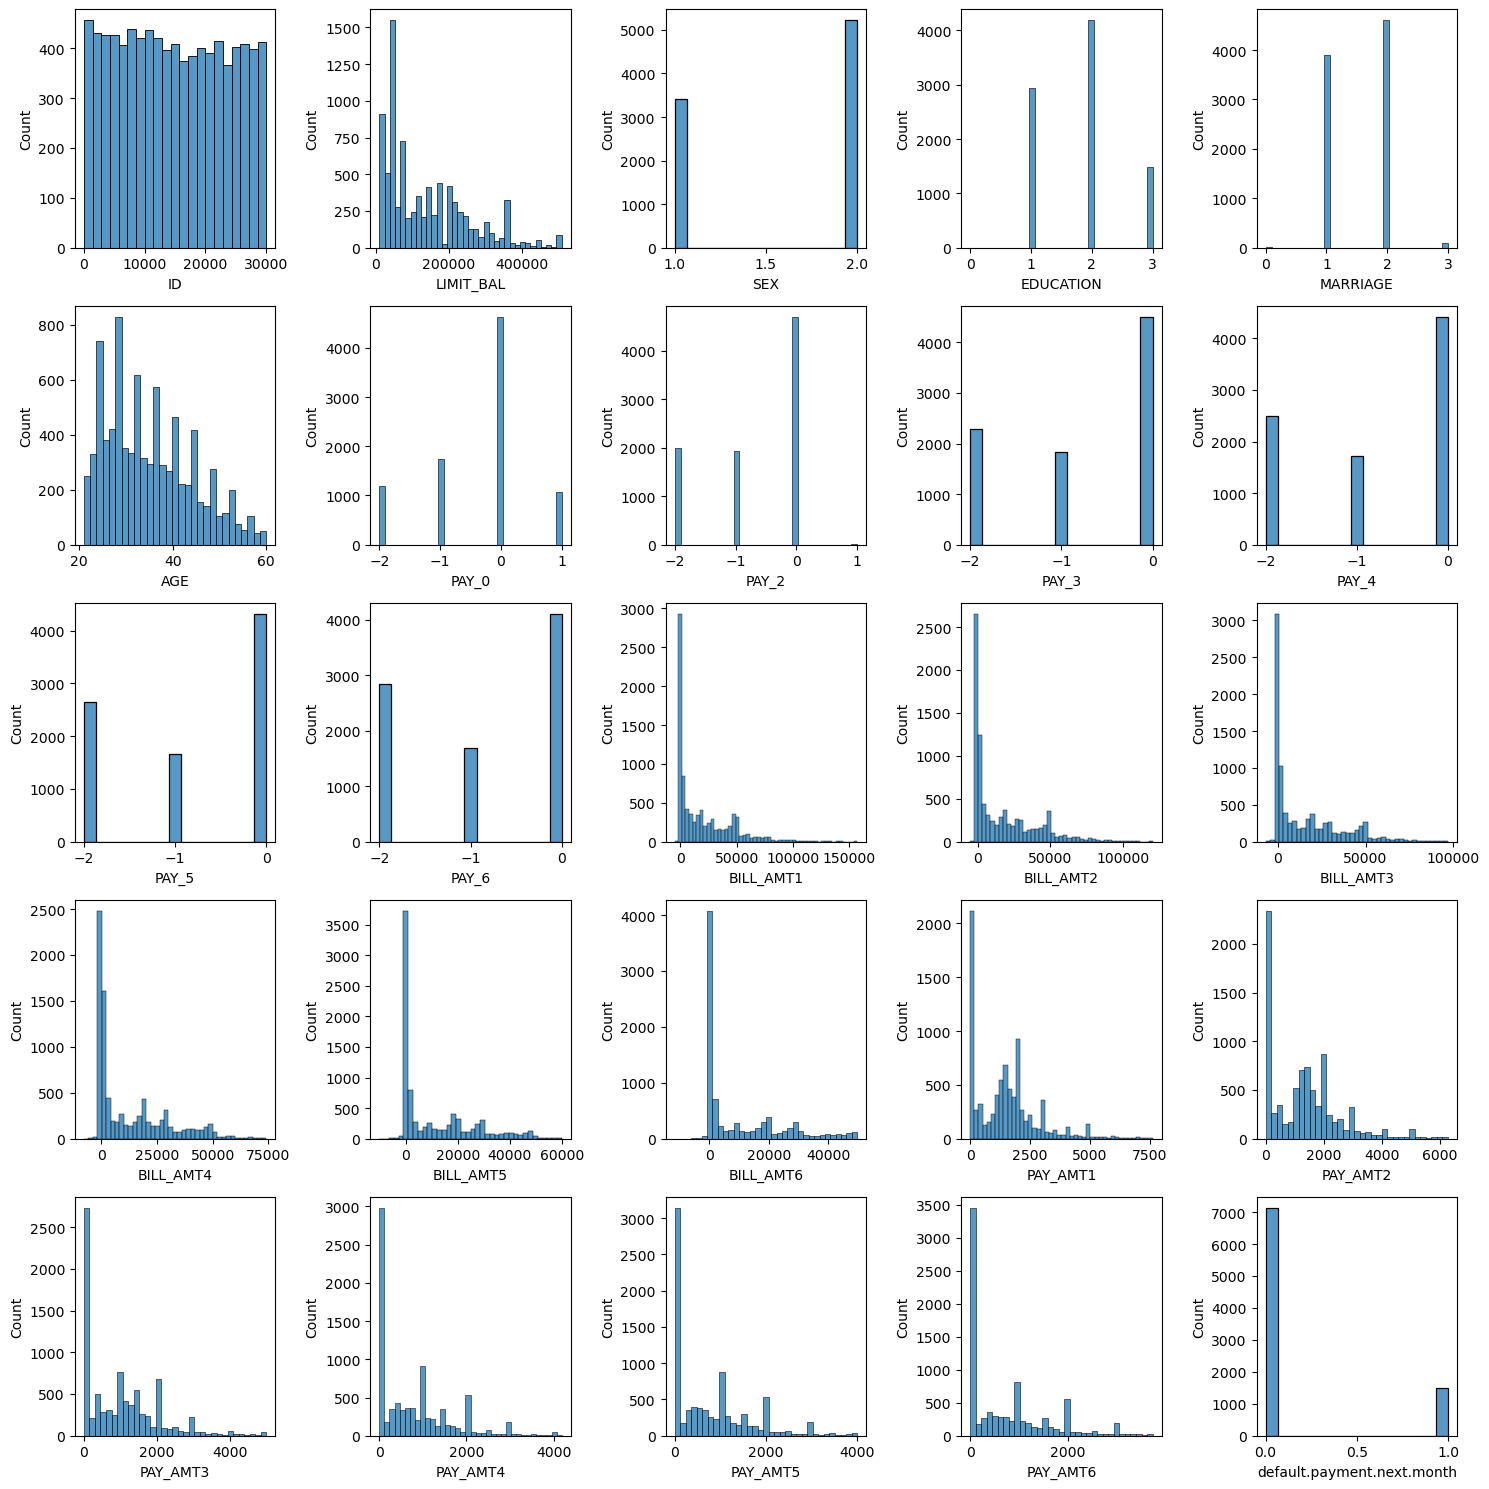

In [36]:
plt.figure(figsize = (15,15))
for i in range(len(df.columns)):
    plt.subplot(5,5, i+1)
    sns.histplot(x = df.columns[i], data = df)
    plt.tight_layout()

In [37]:
## Multivariate Analysis

In [38]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [39]:
filtered_cols = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
len(filtered_cols)

6

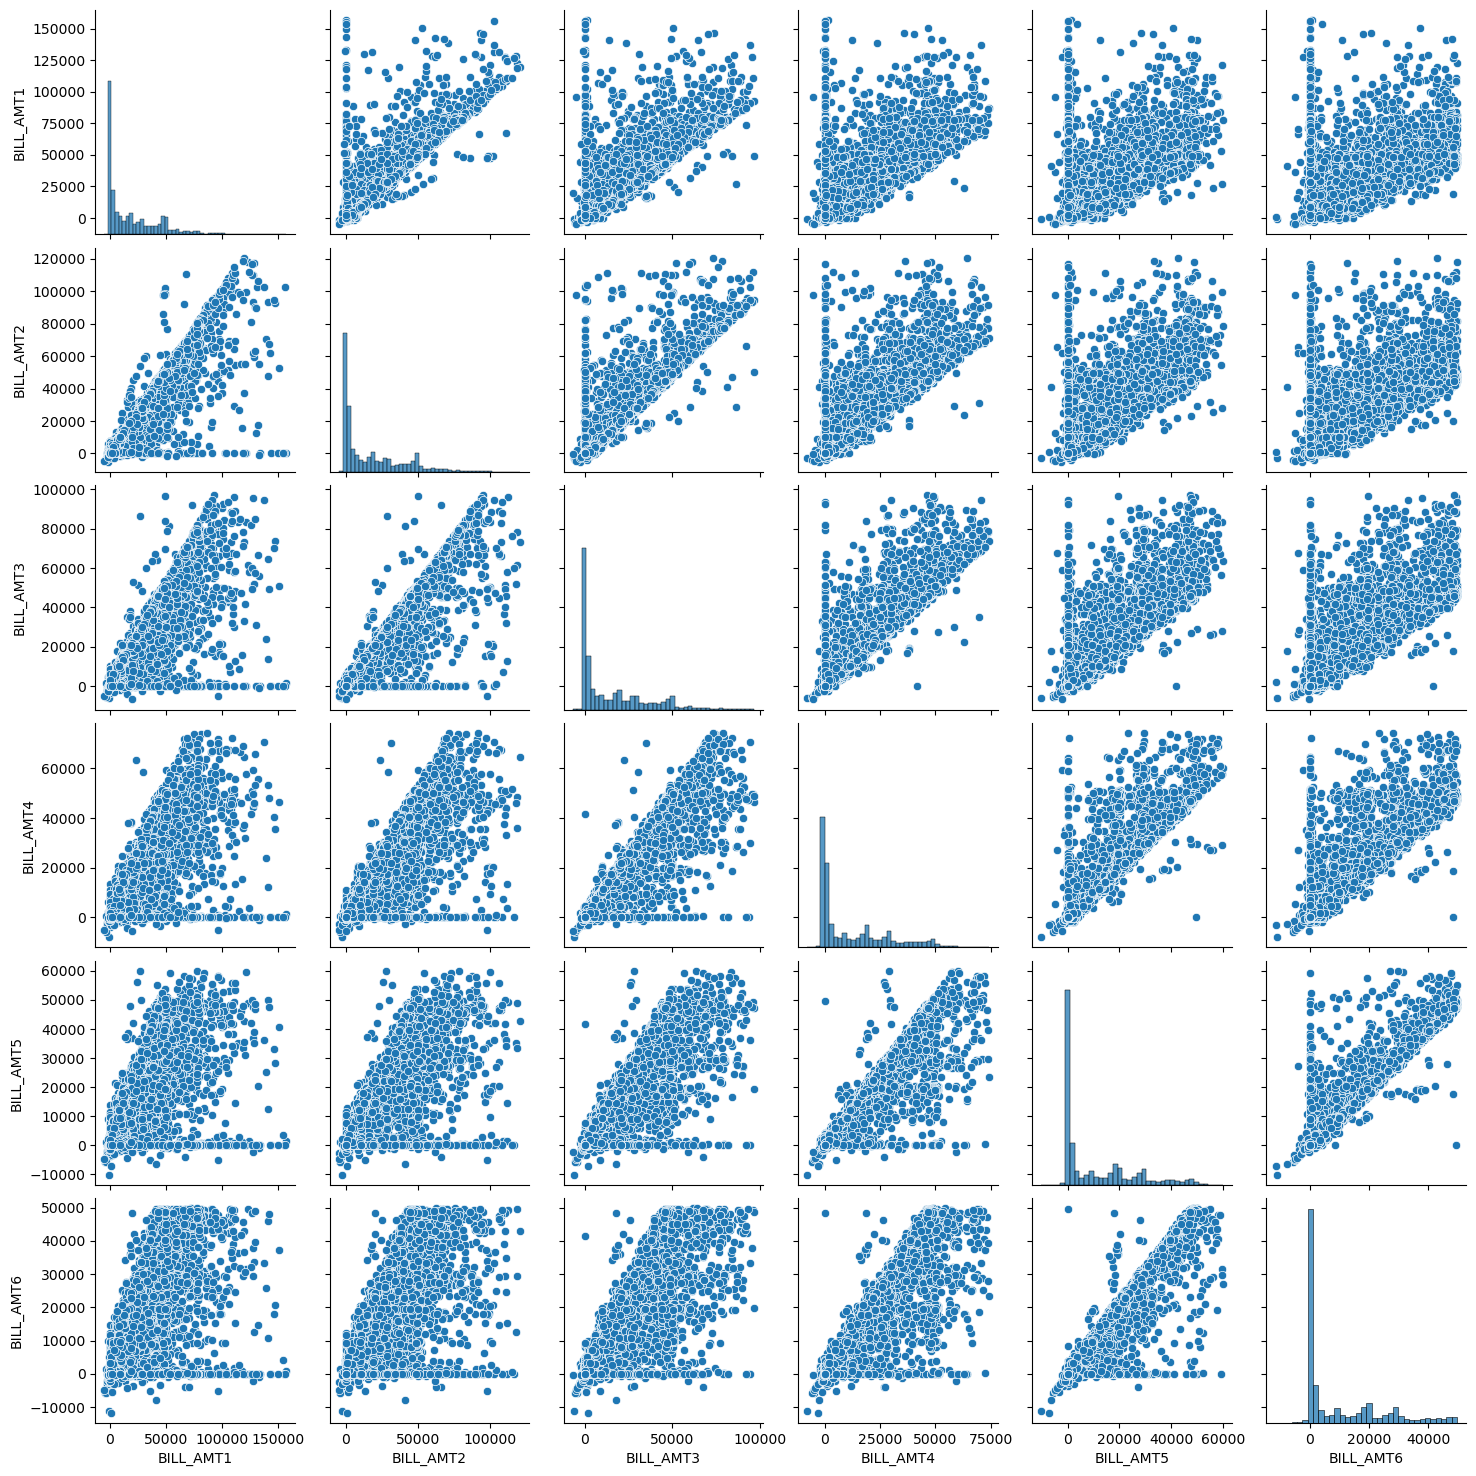

In [42]:
sns.pairplot(df[filtered_cols])

<Axes: >

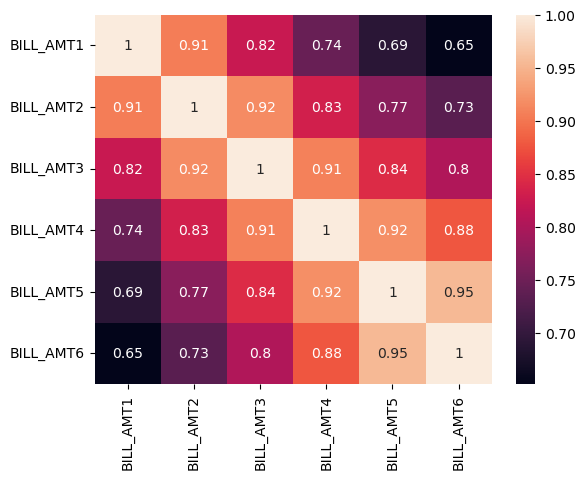

In [44]:
sns.heatmap(df[filtered_cols].corr(), annot = True)

### Additional Data Preparation before Modeling

In [47]:
## Feature Engineering

In [48]:
df["bill_amt_1_2_diff"] = df["BILL_AMT2"] - df["BILL_AMT1"]
df["bill_amt_2_3_diff"] = df["BILL_AMT3"] - df["BILL_AMT2"]
df["bill_amt_3_4_diff"] = df["BILL_AMT4"] - df["BILL_AMT3"]
df["bill_amt_4_5_diff"] = df["BILL_AMT5"] - df["BILL_AMT4"]
df["bill_amt_5_6_diff"] = df["BILL_AMT6"] - df["BILL_AMT5"]


In [49]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,bill_amt_1_2_diff,bill_amt_2_3_diff,bill_amt_3_4_diff,bill_amt_4_5_diff,bill_amt_5_6_diff
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,1243.0,1058.0,-20977.0,645.0,588.0
5,6,50000.0,1,1,2,37,0,0,0,0,...,657.0,1000.0,1000.0,800.0,0,-7331.0,539.0,-38214.0,225.0,405.0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,0.0,581.0,1687.0,1542.0,0,-11496.0,221.0,-380.0,-380.0,726.0
18,19,360000.0,2,1,1,49,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
19,20,180000.0,2,1,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8624 entries, 3 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          8624 non-null   int64  
 1   LIMIT_BAL                   8624 non-null   float64
 2   SEX                         8624 non-null   int64  
 3   EDUCATION                   8624 non-null   int64  
 4   MARRIAGE                    8624 non-null   int64  
 5   AGE                         8624 non-null   int64  
 6   PAY_0                       8624 non-null   int64  
 7   PAY_2                       8624 non-null   int64  
 8   PAY_3                       8624 non-null   int64  
 9   PAY_4                       8624 non-null   int64  
 10  PAY_5                       8624 non-null   int64  
 11  PAY_6                       8624 non-null   int64  
 12  BILL_AMT1                   8624 non-null   float64
 13  BILL_AMT2                   8624 non-

In [51]:
## Train Test Split

In [52]:
X = df.drop(columns = ["default.payment.next.month"])
y = df["default.payment.next.month"]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6036, 29)
(2588, 29)
(6036,)
(2588,)


### Modeling

In [56]:
## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
## Hyperparameter Tuning

In [61]:
params = {
    "max_depth" : [2,3,4,5,7,10,15],
    "min_samples_leaf" : [10,15,25,50,100]
}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 5,
                           scoring = "roc_auc"
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 15],
                         'min_samples_leaf': [10, 15, 25, 50, 100]},
             scoring='roc_auc')

In [64]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=25)

### Evaluation

In [66]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)

In [67]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.23841059602649006
0.059602649006622516
0.0


In [68]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.2231404958677686
0.4153846153846154
0.0


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rf_best = rf_best.predict_proba(X_test)[:,1]


In [70]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rf_best))

0.531149091924252
0.5911932420346272
0.6439381484870574


### Business Conclusion

#### Business Impact

In [73]:
# Final Model = Random Forest with Hyperparameter Tuning
# AUC = 64%

# Before the model :
    # Assume we accept 1000 customers
    # But as we don't know the default probability, we accept randomly
    # Default rate =30%

# After the model :
    # We know which customers that have highter probability to default
    # If want to accept the same number of customers (1000)
    # Then, we can choose top 1000 customers with lower score
    # Default rate can be calculated with ordering the result and see the actual cumulative default rate